# <center>Non Linear Regression</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Data

In [2]:
data = pd.read_csv("data/china_gdp.csv")
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the dataset for visulization to fit the best curve

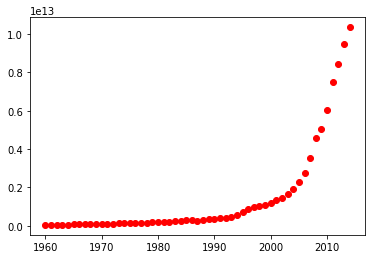

In [3]:
year = np.asanyarray(data['Year'])
gdp = np.asanyarray(data['Value'])

plt.scatter(year, gdp, c='r')
plt.show()

The best fit curve by visulization seems to be **Sigmoid function** as it gradualy increases in the Beginning then Exponentially increases in the middle then finally saturates.

### Best Curve fit: Sigmoid

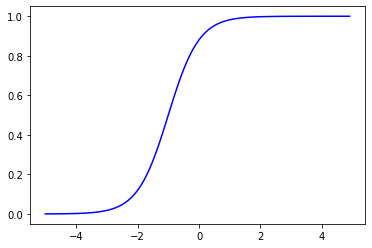

In [4]:
def mySigmoid(x, a, b):
    """Returns sigmoid function with a, b as parameters 
    
    a: helps to increase the curve
    b: helps to slide the curve along x
    """
    return 1 / (1 + np.exp(-a * (x - b)))

x = np.arange(-5, 5, 0.1)
y = mySigmoid(x, 2, -1)

plt.plot(x, y, c='b')
plt.show()

### Train/Test Split normalized data 80:20 

In [5]:
mask = np.random.rand(len(year)) < 0.8

n_train_x = year[mask]/max(year)
n_train_y = gdp[mask]/max(gdp)

n_test_x = year[~mask]/max(year)
n_test_y = gdp[~mask]/max(gdp)

### Find the Parameters for the best fit curve (mySigmoid)
curve_fit uses non linear least squares to fit our mySigmoid function for the parameters (a, b)

In [6]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(mySigmoid, n_train_x, n_train_y)

# Parameters
a = popt[0]
b = popt[1]
print("a: ", a)
print("b: ", b)

a:  675.2426141856704
b:  0.9972686967901457


### Plotting the Curve

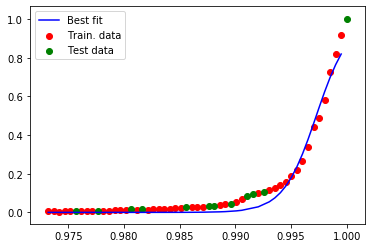

In [7]:
plt.plot(n_train_x, mySigmoid(n_train_x, a, b), c='b', label='Best fit')
plt.scatter(n_train_x, n_train_y, c='r', label='Train. data')
plt.scatter(n_test_x, n_test_y, c='g', label='Test data')
plt.legend()
plt.show()

### Prediction and Evaluation

In [8]:
n_predicted_y = mySigmoid(n_test_x, a, b)

from sklearn.metrics import r2_score
print("R2 Score: ", r2_score(n_test_y, n_predicted_y))

R2 Score:  0.9557856908259068
